교도소로 이송 중이던 흉악범이 탈출하는 사건이 발생하여 수색에 나섰다. 탈주범은 탈출한 지 한 시간 뒤, 맨홀 뚜껑을 통해 지하터널의 어느 한 지점으로 들어갔으며, 지하 터널 어딘가에서 은신 중인 것으로 추정된다.터널끼리 연결이 되어 있는 경우 이동이 가능하므로 탈주범이 있을 수 있는 위치의 개수를 계산하여야 한다. 탈주범은 시간당 1의 거리를 움직일 수 있다. 지하 터널은 총 7 종류의 터널 구조물로 구성되어 있으며 각 구조물 별 설명은 [표 1]과 같다.

 
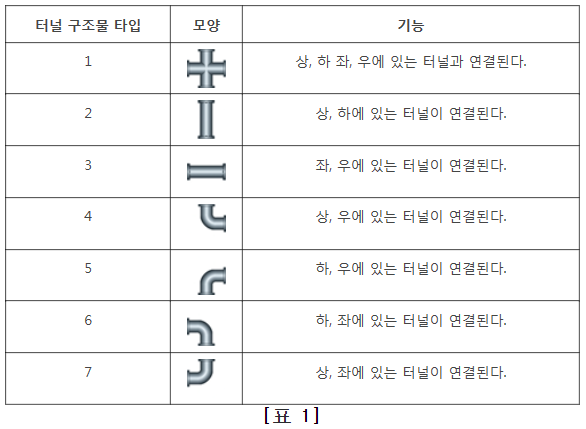


[그림 1-1] 은 지하 터널 지도의 한 예를 나타낸다. 이 경우 지도의 세로 크기는 5, 가로 크기는 6 이다. 맨홀 뚜껑의 위치가 ( 2, 1 ) 으로 주어질 경우, 이는 세로 위치 2, 가로 위치 1을 의미하며 [그림 1-2] 에서 붉은 색으로 표기된 구역이다. 탈주범이 탈출 한 시간 뒤 도달할 수 있는 지점은 한 곳이다. 탈주범이 2시간 후 도달할 수 있는 지점은, [그림 1-3] 과 같이 맨홀 뚜껑이 위치한 붉은 색으로 표시된 지하도 와 파란색으로 표기된 지하도까지 총 3개의 장소에 있을 수 있다. 3시간 후에는 [그림 1-4] 과 같이 총 5개의 지점에 있을 수 있다.
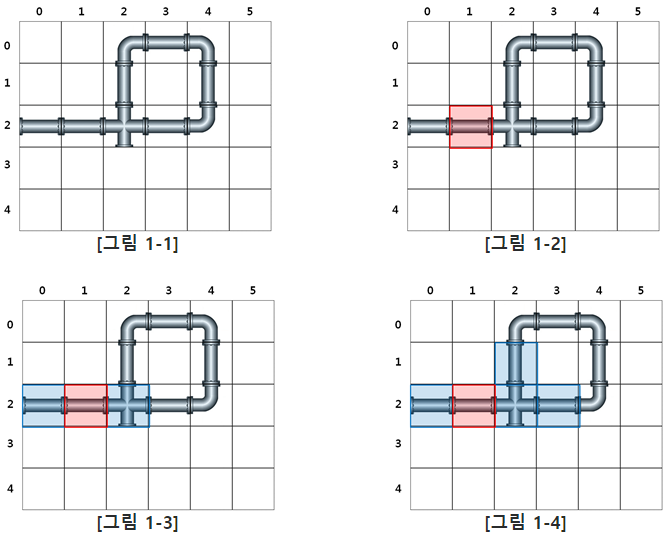


[그림 2-1] 에서 맨홀뚜껑이 위치한 지점이 ( 2, 2 ) 이고 경과한 시간이 6 으로 주어질 경우, [그림 2-2] 에서 맨홀뚜껑이 위치한 지점은 붉은 색, 탈주범이 있을 수 있는 장소가 푸른색으로 표기되어 있다. 탈주범이 있을 수 있는 장소는, 맨홀뚜껑이 위치한 지점을 포함하여 총 15 개 이다.
       
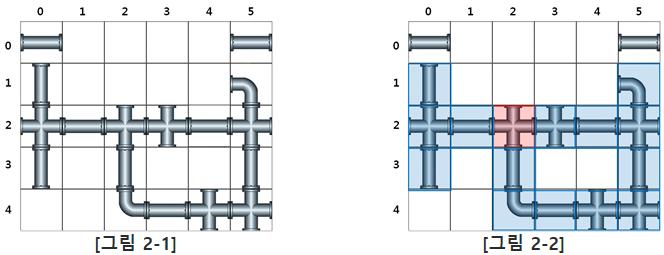

지하 터널 지도와 맨홀 뚜껑의 위치, 경과된 시간이 주어질 때 탈주범이 위치할 수 있는 장소의 개수를 계산하는 프로그램을 작성하라.


[제약 사항]

1. 시간 제한 : 최대 50개 테이트 케이스를 모두 통과하는데, C/C++/Java 모두 1초
2. 지하 터널 지도의 세로 크기 N, 가로 크기 M은 각각 5 이상 50 이하이다. (5 ≤ N, M ≤ 50)
3. 맨홀 뚜껑의 세로 위치 R 은 0 이상 N-1이하이고 가로 위치 C 는 0 이상 M-1이하이다. (0 ≤ R ≤ N-1, 0 ≤ C ≤ M-1)
4. 탈출 후 소요된 시간 L은 1 이상 20 이하이다. (1 ≤ L ≤ 20)
5. 지하 터널 지도에는 반드시 1개 이상의 터널이 있음이 보장된다.
6. 맨홀 뚜껑은 항상 터널이 있는 위치에 존재한다.

[입력]

첫 줄에 총 테스트 케이스의 개수 T가 주어진다. 두 번째 줄부터 T개의 테스트 케이스가 차례대로 주어진다. 각 테스트 케이스의 첫 줄에는 지하 터널 지도의 세로 크기 N, 가로 크기 M, 맨홀 뚜껑이 위치한장소의 세로 위치 R, 가로 위치 C, 그리고 탈출 후 소요된 시간 L 이 주어진다. 그 다음 N 줄에는 지하 터널 지도 정보가 주어지는데, 각 줄마다 M 개의 숫자가 주어진다. 숫자 1 ~ 7은 해당 위치의 터널 구조물 타입을 의미하며 숫자 0 은 터널이 없는 장소를 의미한다.

[출력]
테스트 케이스의 개수만큼 T줄에 T개의 테스트 케이스 각각에 대한 답을 출력한다. 각 줄은 “#x”로 시작하고 공백을 하나 둔 다음 정답을 기록한다. (x는 1부터 시작하는 테스트 케이스의 번호이다) 출력해야 할 정답은 탈주범이 위치할 수 있는 장소의 개수이다.

## input() ver.

In [93]:
import sys

direction = {0:[(0,0)], 1:[(1,0),(-1,0),(0,1),(0,-1),(0,0)], 2:[(1,0),(-1,0),(0,0)], 3:[(0,1),(0,-1),(0,0)], 
             4:[(-1,0),(0,1),(0,0)], 5:[(1,0),(0,1),(0,0)], 6:[(1,0),(0,-1),(0,0)], 7:[(-1,0),(0,-1),(0,0)]}

state = {"r":0, "c":0, "t":0}
que = []

T = int(input())

for test_case in range(1, T+1):
    N, M, R, C, L  = map(int, input().split(" "))
    maps = [[0]*M for _ in range(N)]
    visited = [[0]*M for _ in range(N)]
    for row in range(N):
        l = list(map(int, input().split(" ")))
        for col in range(M):
            maps[row][col] = l[col]

    count = 1
    state["r"], state["c"], state["t"] = R, C, 1
    que.append(state)
    visited[R][C] = 1
    while len(que) > 0:
        curr_state = que.pop(0)
        curr_r, curr_c, curr_t = curr_state["r"], curr_state["c"], curr_state["t"]
        if curr_t >= L:
            continue
        for h, v in direction[maps[curr_r][curr_c]]:
            next_r, next_c, next_t = curr_r+h, curr_c+v, curr_t+1

            can_move = (next_r < N) and (next_r >= 0) and (next_c < M) and (next_c >= 0)
            if (can_move == True):
                is_open = False
                for h, v in direction[maps[next_r][next_c]]:
                    tmp_r, tmp_c = next_r+h, next_c+v
                    if (tmp_r==curr_r) and (tmp_c==curr_c):
                        is_open = True
                if (visited[next_r][next_c] < 1) and (is_open==True):
                    new_state = {"r":next_r, "c":next_c, "t":curr_t + 1}
                    que.append(new_state)
                    visited[next_r][next_c] = 1
                    count += 1
    print("#%d %d" %(test_case, count))

5
3 3 2 2 4
5 3 6
4 0 2
3 3 1
#1 6
5 6 2 1 3
0 0 5 3 6 0
0 0 2 0 2 0
3 3 1 3 7 0
0 0 0 0 0 0
0 0 0 0 0 0
#2 5


KeyboardInterrupt: Interrupted by user

## sys.stdin ver.

In [100]:
import sys

direction = {0:[(0,0)], 1:[(1,0),(-1,0),(0,1),(0,-1),(0,0)], 2:[(1,0),(-1,0),(0,0)], 3:[(0,1),(0,-1),(0,0)], 
             4:[(-1,0),(0,1),(0,0)], 5:[(1,0),(0,1),(0,0)], 6:[(1,0),(0,-1),(0,0)], 7:[(-1,0),(0,-1),(0,0)]}

state = {"r":0, "c":0, "t":0}
que = []
    
sys.stdin = open("1953_input.txt", "r")

T = int(sys.stdin.readline().strip("\n"))

for test_case in range(1, T+1):
    h = sys.stdin.readline().strip("\n").split(" ")
    N, M, R, C, L = int(h[0]), int(h[1]), int(h[2]), int(h[3]), int(h[4])
    
    maps = [[0]*M for _ in range(N)]
    visited = [[0]*M for _ in range(N)]
    for row in range(N):
        l = sys.stdin.readline().strip("\n").split(" ")
        for col in range(M):
            maps[row][col] = int(l[col])

    count = 1
    state["r"], state["c"], state["t"] = R, C, 1
    que.append(state)
    visited[R][C] = 1
    while len(que) > 0:
        curr_state = que.pop(0)
        curr_r, curr_c, curr_t = curr_state["r"], curr_state["c"], curr_state["t"]
        if curr_t >= L:
            continue
        for h, v in direction[maps[curr_r][curr_c]]:
            next_r, next_c, next_t = curr_r+h, curr_c+v, curr_t+1

            in_range = (next_r < N) and (next_r >= 0) and (next_c < M) and (next_c >= 0)
            if (in_range == True):
                can_move = False
                for h, v in direction[maps[next_r][next_c]]:
                    tmp_r, tmp_c = next_r+h, next_c+v
                    if (tmp_r==curr_r) and (tmp_c==curr_c):
                        can_move = True
                if (visited[next_r][next_c] < 1) and (can_move == True):
                    new_state = {"r":next_r, "c":next_c, "t":curr_t + 1}
                    que.append(new_state)
                    visited[next_r][next_c] = 1
                    count += 1
    print("#%d %d" %(test_case, count))

#1 5
#2 15
#3 29
#4 67
#5 71
